# Airbnb in New York City - Impact of Neighborhoods

## Table of Contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)



## 1. Introduction <a name="introduction"></a>


### 1.1 Background

#### About Airbnb

> **"Millions of Airbnb Hosts connect curious people to an endlessly interesting world.**
> Guests can discover the perfect place to stay for every getaway and explore new experiences while traveling, or online. Hosts can list their extra space, receive hosting tips and support, and earn money while creating memorable moments for guests.**"**

*- This is how Airbnb describe themselves on the Google Playstore*

**Airbnb** is a platform provider for hosts and guests, where hosts can list their properties for the purpose of providing logding and homestay facilities, and guests can avail these said facilities. Founded in the year of 2008, in San Francisco, California - Airbnb has come a long way such that now they have a global presence for providing their one of a kind service.


### 1.2 Problem and Interest

The business model of Airbnb is that it facilitates the rental process of accomodations, lodgings and homestays by providing an online marketplace. The company doesnot own any of the properties in the listings, they just charge a commission for each of the bookings.

Thus one of the most important aspect would be to get an understanding of the locality of the properties and to see if and how it has any impact on its pricing or popularity.

This can be used for taking business decisions by getting an understanding of customers' and providers' behavior and performance on the platform as a result helping to guide marketing initiatives and maybe implementation of innovative additional services, etc.



## 2. Data <a name="data"></a>


So now we move on to the data we will be requiring and using for this analysis.

* We will be using the "New York City Airbnb Open Data" available on Kaggle. The link to the database is: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data
* This dataset has around 49,000 entries with 16 columns. We will not be requiring all the columns and hence we will perform data cleaning and wrangling methods to simplify the data as per our requirement
* Let us now understand the data. The columns for the original dataset and their description are as follows:

| Columns                          | Description                                     |
|:---------------------------------|:------------------------------------------------| 
| `id`                             | id of the listing                               | 
| `name`                           | title of the listing                            |  
| `host_id`                        | id of the host who has listed                   | 
| `host_name`                      | name of the host who has listed                 |
| `neighbourhood_group`            | name of the borough                             |
| `neighbourhood`                  | name of the neighborhood                        |  
| `latitude`                       | location latitude of the listing                | 
| `longitude`                      | location longitude of the listing               |
| `room_type`                      | type of room / accomodation                     |
| `price`                          | price of the listing                            |
| `minimum_nights`                 | minimum number of nights to be booked for       |  
| `number_of_reviews`              | total number of reviews for the listing         | 
| `last_review`                    | date of the last review                         |
| `reviews_per_month`              | average reviews per month                       |
| `calculated_host_listings_count` | total no of listings by the host                |  
| `availability_365 `              | property available for number of days per year  | 

* We already have latitude and longitude data of the properties in the dataset which can be used for finding the nearby venues for these properties using the **Foursquare API** 


Let us load the database and do some basic data wrangling and cleaning

In [1]:
#importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('Libraries successfully imported.')

Libraries successfully imported.


In [2]:
#loading the dataset into a pandas dataframe

airbnb_df = pd.read_csv("https://raw.githubusercontent.com/sarkar-kumardipta/Coursera_Capstone/main/AB_NYC_2019.csv")
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# let us see the size of the dataset

airbnb_df.shape

(48895, 16)


So there are 48,895 rows and 16 columns. Some of the columns contain contain numerical data while the others contain categorical data.

In [4]:
# let us see the datatypes of the dataframe

airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


For our analysis we can remove the data relating to the hosts as it will not be required. Hence we can drop columns `host_id`, `host_name` and `calculated_host_listings_count`.

Also we can remove `last_review` column. 

In [5]:
# let us drop host_id, Host_name and calculated_host_listings_count columns

airbnb_df.drop(['host_id','host_name','calculated_host_listings_count','last_review'], axis=1, inplace=True)

airbnb_df.head()

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,0


Now let us understand the rmining data using the `describe()` method.

In [6]:
# let us now use the describe() method to get a better understanding of the data

airbnb_df.describe(include = 'all')

,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,4.889500e+04,48879,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000
unique,NaN,47905,5,221,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Hillside Hotel,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,NaN,18,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,NaN,NaN
mean,1.901714e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,1.373221,112.781327
std,1.098311e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,1.680442,131.622289
min,2.539000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,0.010000,0.000000
25%,9.471945e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,0.190000,0.000000
50%,1.967728e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,0.720000,45.000000
75%,2.915218e+07,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,2.020000,227.000000



From the `count` parameter we can see some of the values are less than 48,895. This means that some of the data must be null. Let us find out which ones are those.

In [7]:
# let us find the total number of null values per column

airbnb_df.isnull().sum()

id                         0
name                      16
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
availability_365           0
dtype: int64

So we can see that there are 16 null entries in the `name` column and 10,052 null entries in the `reviews_per_month` column.

How should we deal with these?

We can drop the rows where the `name` is null.

And for `reviews_per_month`, we can replace the empty values with 0 as logically empty `reviews_per_month` means no reviews have been given and hence 0 should suffice.

In [8]:
# let us drop the entries with empty name value

airbnb_df.dropna(subset = ["name"], inplace=True)

# Let us replace the empty 'reviews_per_month' with 0

airbnb_df.fillna({'reviews_per_month':0}, inplace=True)

airbnb_df.reset_index()

airbnb_df.isnull().sum()

id                     0
name                   0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
availability_365       0
dtype: int64


Also we can observe from the previous outputs, in the `availability_365` some of the values are 0.

So the properties which are never available throughout the year will create noise for our model, hence it is better to get rid of them.

So we will remove the entries with `availability_365` having value of 0

In [9]:
# Let us see how many 'availability_365' values are 0.

len(airbnb_df.loc[airbnb_df["availability_365"] == 0])

17521

In [10]:
# Let us drop these rows

airbnb_df = airbnb_df[airbnb_df.availability_365 > 0]

print("The dataframe has {} rows and {} columns.".format(airbnb_df.shape[0],airbnb_df.shape[1]))

airbnb_df.head()

The dataframe has 31358 rows and 12 columns.


,id,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2539,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,365
1,2595,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,365
3,3831,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,129



Now the finishing step for our data preparation process. 

Here `price` is our dependant variables and rest other parameters are independant variables. Hence we will move the `price` column to the last column for easier visualization and understanding.

Also we will drop the `id` column as it will also not be required for the analysis.

Let us also rename the `neighbourhood_group` column as `borough`.

In [11]:
# let us drop the id column

airbnb_df.drop(['id'], axis=1, inplace=True)

# Moving price column to the last

airbnb_df = airbnb_df[['name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month',
                     'availability_365','price']]

# Renameing 'neighborhood_group' to borough

airbnb_df.rename(columns={'neighbourhood_group': 'borough'}, inplace=True)

# The prepped dataset
airbnb_df.head()

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,365,149
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,355,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,365,150
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,194,89
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,3,74,0.59,129,200




## 3. Methodology <a name="methodology"></a>


Now that we have the cleaned data we can start with our analysis.

So our methodology for the analysis will be as follows:

* As we already mentioned, for our analysis *price* will be the dependant variable and we will try the understand how the variables are affecting it. We will conduct Exploratory Data Analysis to understands the relationships and trends.

* In our dataset we have the location *latitudes* and *longitudes* for each of the properties. Using the **Foursquare API** we will find the venues nearby to each of the properties and form clusters by using **Kmeans Clustering**. Once we have the cluster labels, we will analyse the *price* trends for each of the cluster and try to observe if there is any relationship or trend.



## 4. Analysis <a name="analysis"></a>


### 4.1 Exploratory Data Analysis

In [12]:
# Let us use the describe() method on the cleaned data

airbnb_df.describe(include = 'all')

,name,borough,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
count,31358,31358,31358,31358.000000,31358.000000,31358,31358.000000,31358.000000,31358.000000,31358.000000,31358.000000
unique,30885,5,218,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,Hillside Hotel,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN,NaN
freq,18,13557,2482,NaN,NaN,16531,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,40.728399,-73.948744,NaN,8.307673,31.855444,1.509769,175.808821,162.046272
std,NaN,NaN,NaN,0.056559,0.051397,NaN,23.170982,51.639209,1.781310,126.178954,254.437200
min,NaN,NaN,NaN,40.499790,-74.244420,NaN,1.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,40.688383,-73.983270,NaN,2.000000,2.000000,0.170000,55.000000,70.000000
50%,NaN,NaN,NaN,40.723720,-73.954110,NaN,3.000000,10.000000,0.920000,167.000000,111.000000
75%,NaN,NaN,NaN,40.763030,-73.930140,NaN,5.000000,39.000000,2.340000,305.000000,189.000000



#### Boroughs

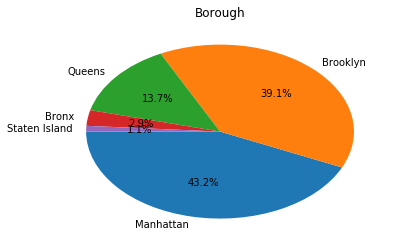

<Figure size 360x360 with 0 Axes>

,number of listings
Manhattan,13557
Brooklyn,12259
Queens,4298
Bronx,913
Staten Island,331


In [13]:
# Now let us see how many properties are lsited per borough

airbnb_borough_vc = airbnb_df['borough'].value_counts().to_frame()

airbnb_borough_vc.rename(columns={'borough': 'number of listings'}, inplace=True)

pie = plt.pie(airbnb_borough_vc, labels=airbnb_borough_vc.index,autopct='%1.1f%%', startangle=180)

plt.title('Borough')
plt.figure(figsize=(5,5))

plt.show()

airbnb_borough_vc


There are 5 boroughs in the City of New York, which is also evident from the table. As above we can see a pie chart and a table showing the distribution ob listings per borough.

We would have assumed *Manhattan* and *Brooklyn* to have higher listings compared to the other boroughs as these two are comparatively busier and more crowded than the rest. And now we can see that our data also reflects the same. 

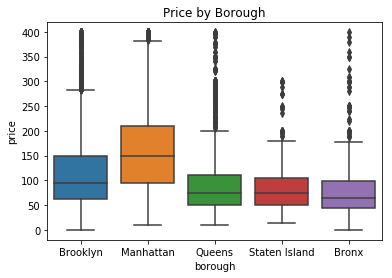

In [14]:
# Let us now use boxplots to see the distribution of price for each of the boroughs

box = sns.boxplot(x='borough',y='price',
                   data=airbnb_df[airbnb_df.price<400]).set(title='Price by Borough')

Again as we can see from the above boxplot, the mean price is higher in the more popular boroughs of *Brooklyn* and *Manhattan*. This is also expected.


#### Neighborhoods

In [43]:
# Let us view the locations of the listings color coded as per average listing price per neighborhood 

#!conda install -c conda-forge geopy --yes
#!pip install geopy
#!pip install folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

import matplotlib.cm as cm
import matplotlib.colors as colors

import folium

address = 'New York, US'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
#print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

aribnb_df_ng = airbnb_df[['neighbourhood','latitude','longitude',
                          'price']].groupby(['neighbourhood'],as_index=False).mean()

aribnb_df_ng.sort_values(by=['price'], ascending=False, inplace =True)
aribnb_df_ng = aribnb_df_ng.reset_index(drop=True)
aribnb_df_ng.reset_index(level=0, inplace=True)

#aribnb_df_ng

x = np.arange(len(aribnb_df_ng))
ys = [i + x + (i*x)**2 for i in range(len(aribnb_df_ng))]
colors_array = cm.autumn(np.linspace(0, 1, len(ys)))
autumn = [colors.rgb2hex(i) for i in colors_array]

map_ny = folium.Map(location=[latitude, longitude], tiles = 'Stamen Terrain', zoom_start=11)

markers_colors = []
for lat, lon, poi, index, price in zip(aribnb_df_ng['latitude'], aribnb_df_ng['longitude'], aribnb_df_ng['neighbourhood'], aribnb_df_ng['index'], aribnb_df_ng['price']):
    label = folium.Popup('Neighborhood: ' + str(poi) + ' Average Price: ' + str(round(price,2)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=autumn[index-1],
        fill=True,
        fill_color=autumn[index-1],
        fill_opacity=0.7).add_to(map_ny)
       
map_ny

The above Folium Map of New York shows us the markers per neighborhood, color coded with respect to average price of listings from highest to lowest. Here, the color gradient is red to yellow, where red shows the higest value and yellow shows the least.

As we can see from the above map, the listings for the neighborhoods of Manhattan are concentrated in red. This shows that the prices are comparatively higher for the properties in Manhattan. This also goes in line with the fact that in real life the Manhattan area is more high cost comapred to other areas of New York.

Similarly, average prices are lower in the neighborhoods of Bronx and Staten Island as can be seen from the map markers. This is also as per expectation.